# Traffic Sign Recognition using a Convolutional Neural Network
This notebook walks through the complete process of building, training, and evaluating a Convolutional Neural Network (CNN) to classify traffic signs from the GTSRB dataset.

---

In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator

---
## 1: Loading the Dataset 
This block will loop through all 43 class folders inside `datasets/Train`. It reads each image, resizes it to a standard 32x32 pixels, and then stores the image data and its corresponding label in two big lists.

In [68]:
data = []
labels = []
classes = 43
data_dir = 'datasets'

print("Loading all the images...")

for i in range(classes):
    path = os.path.join(data_dir, 'Train', str(i))
    images = os.listdir(path)

    for img_name in images:
        try:
            image = cv2.imread(os.path.join(path, img_name))
            image_resized = cv2.resize(image, (32, 32))
            
            data.append(image_resized)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {img_name} with error {e}")

print("Done loading!")

data = np.array(data)
labels = np.array(labels)

Loading all the images...
Done loading!


In [69]:
print("Shape of the image data:", data.shape)
print("Shape of the labels:", labels.shape)

Shape of the image data: (39209, 32, 32, 3)
Shape of the labels: (39209,)


---
## 2. Data Preprocessing
After loading, the dataset is preprocessed for training. This involves three critical steps:
1.  **Train-Test Split**: The data is partitioned into training (80%) and testing (20%) sets. This ensures the model is evaluated on data it has not seen during training.
2.  **Normalization**: The pixel values of the images are scaled from their original 0-255 range to a 0-1 range by dividing by 255.0. This aids in faster and more stable model training.
3.  **One-Hot Encoding**: The integer labels are converted into a binary matrix format. This is necessary for categorical cross-entropy, the chosen loss function for multi-class classification.


In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

In [55]:
print("Training images shape:", X_train.shape)
print("Testing images shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (31367, 32, 32, 3)
Testing images shape: (7842, 32, 32, 3)
Training labels shape: (31367, 43)
Testing labels shape: (7842, 43)


---
## 3. CNN Model Architecture
A Sequential Convolutional Neural Network (CNN) is constructed using the Keras API. The architecture consists of:
- Two convolutional blocks, each containing a `Conv2D` layer followed by a `MaxPool2D` layer for feature extraction.
- `Dropout` layers to prevent overfitting by randomly deactivating neurons during training.
- A `Flatten` layer to convert the 2D feature maps into a 1D vector.
- Two `Dense` layers for classification, with the final layer using a `softmax` activation function to output a probability distribution across the 43 classes.

The model is then compiled with the Adam optimizer and categorical cross-entropy loss function. A summary of the architecture is printed below.


In [56]:
model = Sequential()
model.add(keras.Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 622,059 (2.37 MB)

 Trainable params: 622,059 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

---
## 4. Data Augmentation and Model Training
To improve the model and prevent overfitting, **data augmentation** is applied to the training set. An `ImageDataGenerator` is configured to create modified versions of the training images on-the-fly by applying random rotations, zooms, and shifts.

The model is then trained using the `fit` method, which is fed data from the `ImageDataGenerator`. The training process is monitored using the validation set (`validation_data`) to evaluate performance on unseen data after each epoch.


In [62]:
# history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

In [58]:
# Data Augmentation
print("----With data augmentation----")
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, fill_mode='nearest')
datagen.fit(X_train)
history_augmented = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=15, validation_data=(X_test, y_test))

----With data augmentation----
Epoch 1/15


C:\Users\XPS\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.3417 - loss: 2.3179 - val_accuracy: 0.7270 - val_loss: 0.9409
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.6299 - loss: 1.1697 - val_accuracy: 0.8781 - val_loss: 0.4500
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.7430 - loss: 0.8007 - val_accuracy: 0.9458 - val_loss: 0.2437
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8073 - loss: 0.6047 - val_accuracy: 0.9733 - val_loss: 0.1242
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8457 - loss: 0.4837 - val_accuracy: 0.9815 - val_loss: 0.1071
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.8725 - loss: 0.4053 - val_accuracy: 0.9848 - val_loss: 0.0681
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.8897 - loss: 0.3458 - val_accuracy: 0.9903 - val_loss: 0.0519
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9054 - loss: 0.2946 - val_accurac

---
## 5. Performance Evaluation
After training, the model's performance is evaluated. The training history, which contains the accuracy and loss values for both training and validation sets for each epoch, is plotted.
- The **Accuracy Plot** shows the model's accuracy on both training and validation data over time.
- The **Loss Plot** shows the model's error on both sets.

Finally, the model's definitive performance is calculated on the test set using `model.evaluate`.


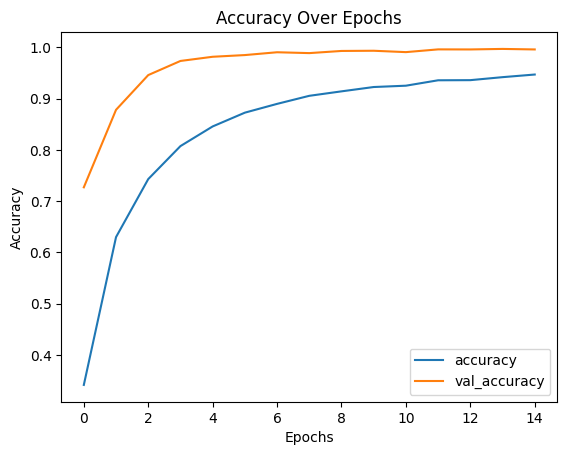

In [59]:
history_df = pd.DataFrame(history_augmented.history)
history_df[['accuracy', 'val_accuracy']].plot(title='Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

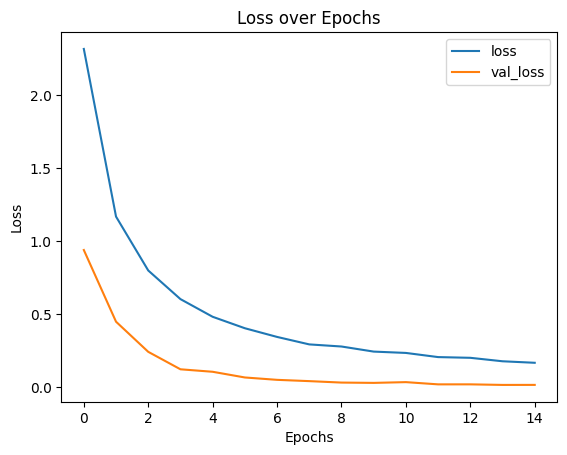

In [60]:
history_df[['loss', 'val_loss']].plot(title='Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9958 - loss: 0.0173
Final Test Accuracy: 99.58%


---
## 6. Confusion Matrix Analysis

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


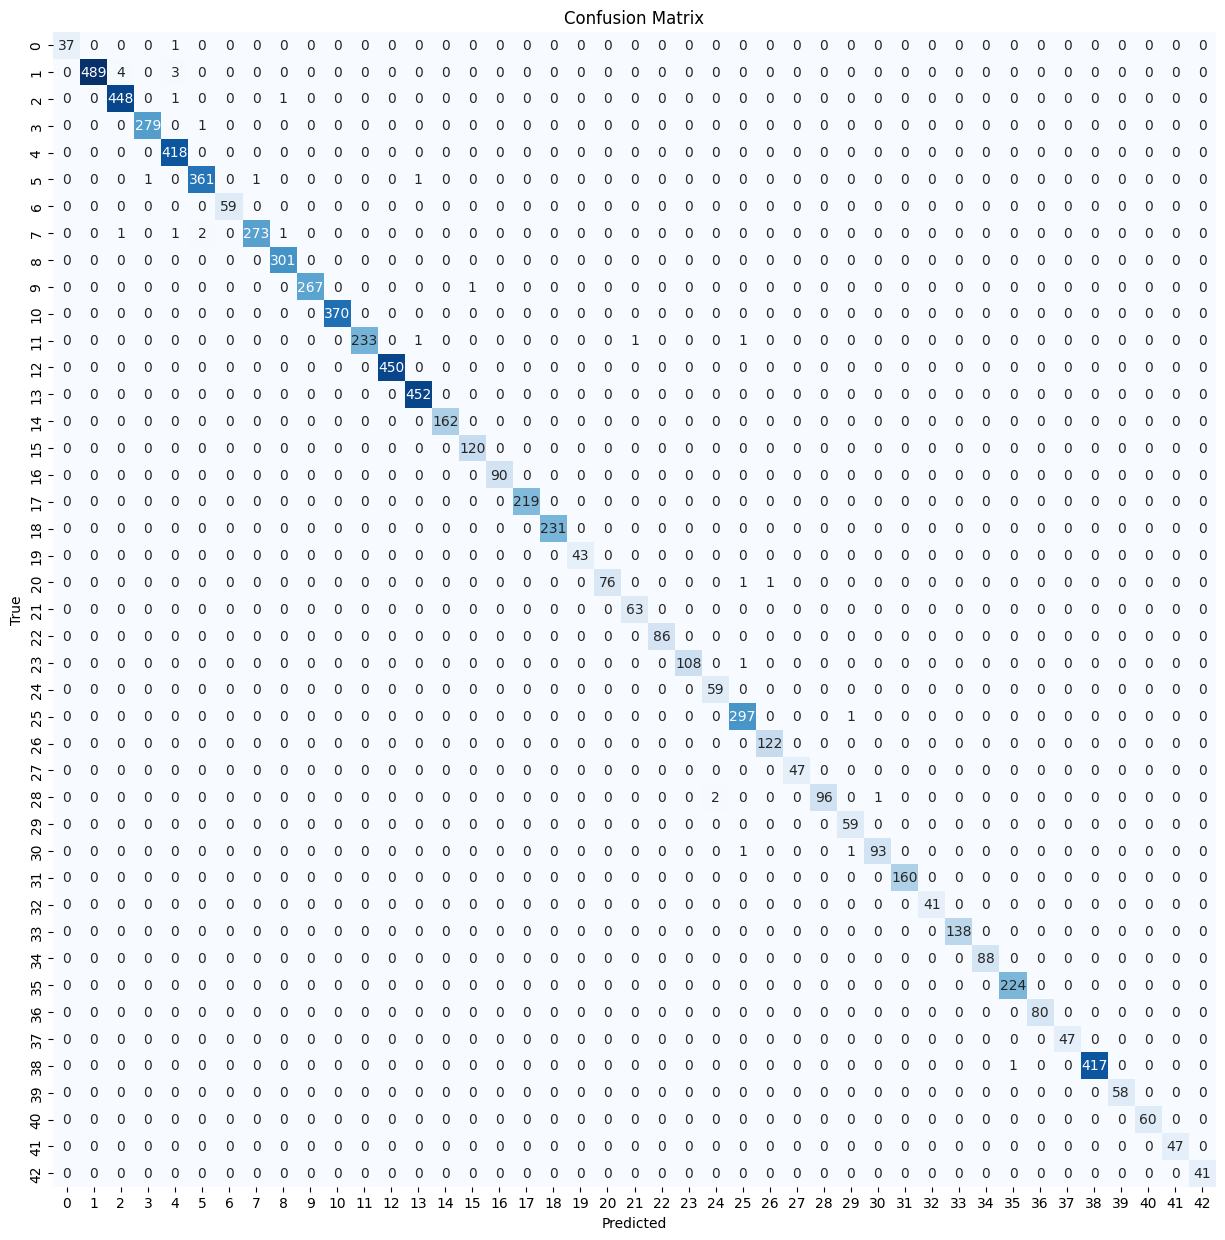

In [63]:
y_pred_temp = model.predict(X_test)

y_pred = np.argmax(y_pred_temp, axis=1)
y_true = np.argmax(y_test, axis=1)

matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

---
## 7. Evaluation on the Official Test Set
The model is tested against the official test set provided with the dataset. The image paths and true labels are loaded from the `Test.csv` file. Each image is preprocessed using the same steps as the training data before being passed to the model for prediction.
The accuracy is calculated, and a sample of the results, showing the image, its true label, and the model's predicted label, is visualized.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy on the first 60 official test images: 98.33%

--- Visualizing a sample of the results ---


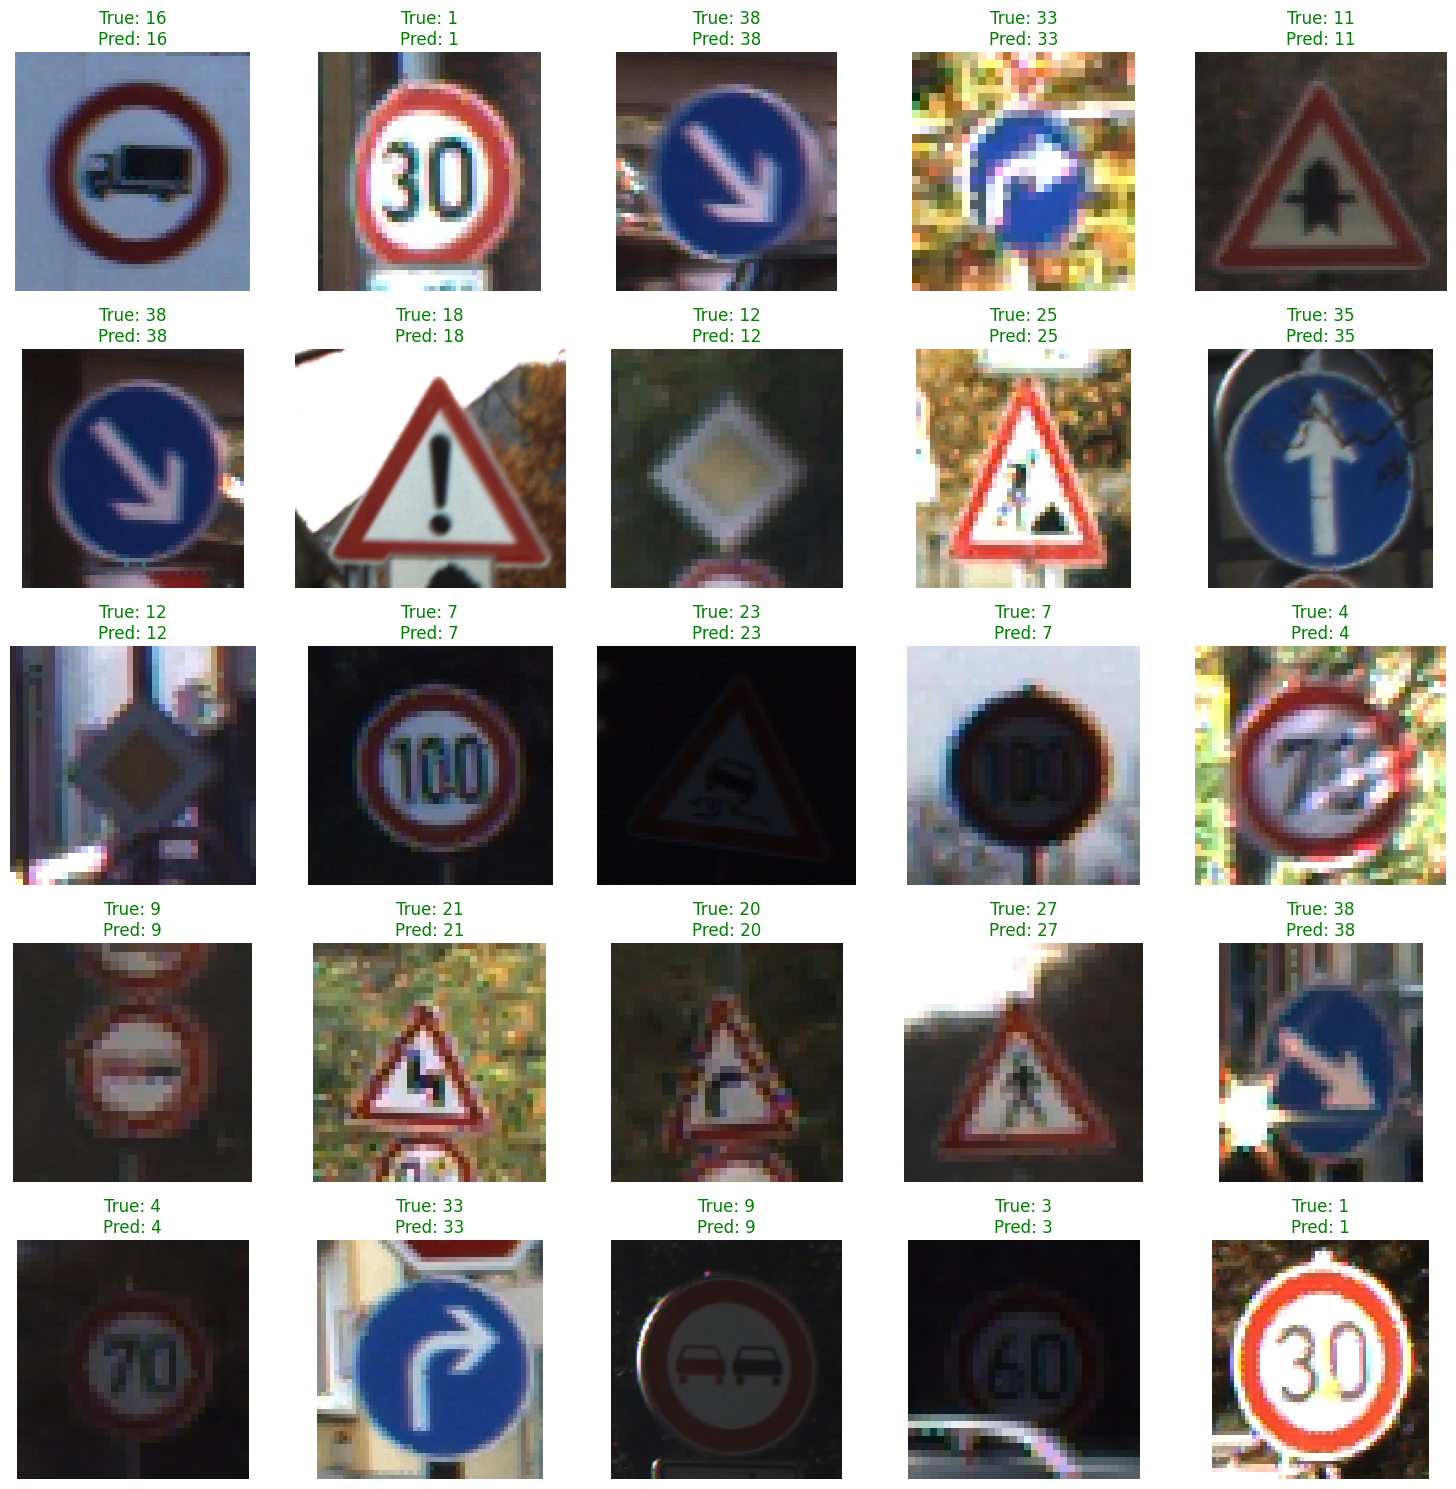

In [66]:
test_labels_df = pd.read_csv(f"{data_dir}/Test.csv")
sample_df = test_labels_df.head(60)
img_paths = sample_df['Path'].values
true_labels = sample_df['ClassId'].values

preprocessed_imgs = []
originals = []

for path in img_paths:
    full_path = os.path.join(data_dir, path)
    img = cv2.imread(full_path)

    originals.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    resized = cv2.resize(img, (32, 32))
    normalized = resized.astype('float32') / 255.0
    preprocessed_imgs.append(normalized)

X_test_final = np.array(preprocessed_imgs)
predictions = model.predict(X_test_final)
predicted_classes = np.argmax(predictions, axis=1)

accuracy = np.sum(predicted_classes == true_labels) / len(true_labels)
print(f"Accuracy on the first {60} official test images: {accuracy * 100:.2f}%")

print("\n--- Visualizing a sample of the results ---")
plt.figure(figsize=(15, 15))
for i in range(min(60, 25)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(originals[i])
    
    title_color = 'green' if true_labels[i] == predicted_classes[i] else 'red'
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_classes[i]}", color=title_color)
    
    plt.axis('off')

plt.tight_layout()
plt.show()